In [4]:
# Imports

# pandas
import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


In [5]:
# get test & test csv files as a DataFrame
train_df = pd.read_csv("data/train.csv")
test_df    = pd.read_csv("data/test.csv")

# preview the data
train_df.head(15)


,id,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,0
5,7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,1
6,8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,0
7,9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,0
8,10,65,Private,184454,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,6418,0,40,United-States,1
9,12,26,Private,82091,HS-grad,9,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,39,United-States,0


In [14]:
#checking out the data types

train_df.info()
print("___________________________")
test_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38973 entries, 0 to 38972
Data columns (total 16 columns):
id                38973 non-null int64
age               38973 non-null int64
workclass         38973 non-null object
fnlwgt            38973 non-null int64
education         38973 non-null object
education-num     38973 non-null int64
marital-status    38973 non-null object
occupation        38973 non-null object
relationship      38973 non-null object
race              38973 non-null object
sex               38973 non-null object
capital-gain      38973 non-null int64
capital-loss      38973 non-null int64
hours-per-week    38973 non-null int64
native-country    38973 non-null object
salary            38973 non-null int64
dtypes: int64(8), object(8)
memory usage: 4.8+ MB
___________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6878 entries, 0 to 6877
Data columns (total 15 columns):
id                6878 non-null int64
age               6878 non-null int6

In [4]:
# drop unnecessary columns, these columns won't be useful in analysis and prediction
train_df = train_df.drop(['id'], axis=1)
test_df  = test_df.drop(['id'], axis=1)



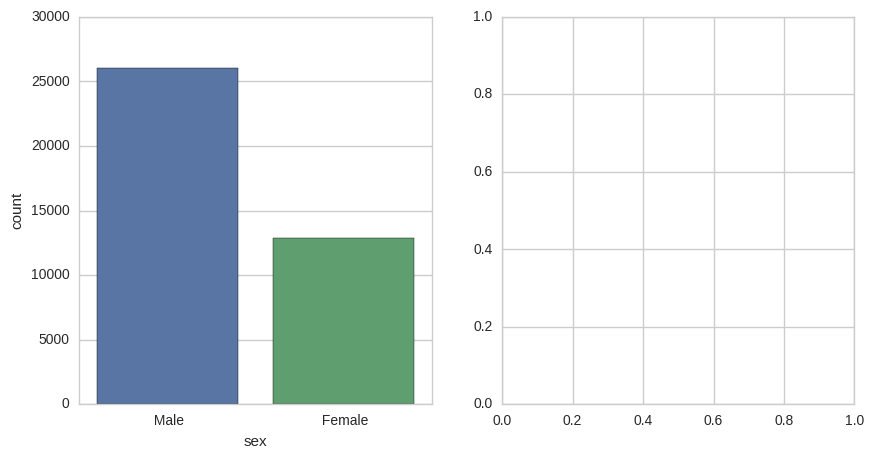

In [27]:
# Sex -- Learning about the data


fig, (axis1,axis2) = plt.subplots(1,2,figsize=(10,5))

# sns.factorplot('Person',data=titanic_df,kind='count',ax=axis1)
sns.countplot(x='sex', data=train_df, ax=axis1)

# average of survived for each Person(male, female, or child)
person_perc = train_df[["sex", "salary"]].groupby(['sex'],as_index=False).mean()
sns.barplot(x='sex', y='salary', data=person_perc, ax=axis2, order=['Male','Female'])


/home/hareesh/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


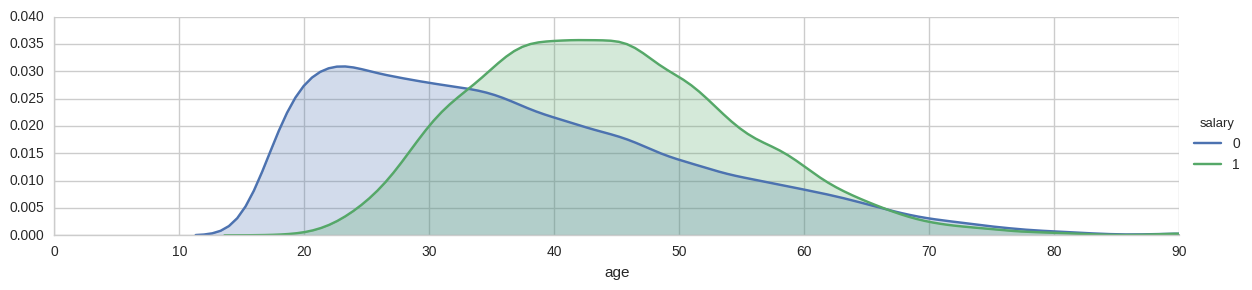

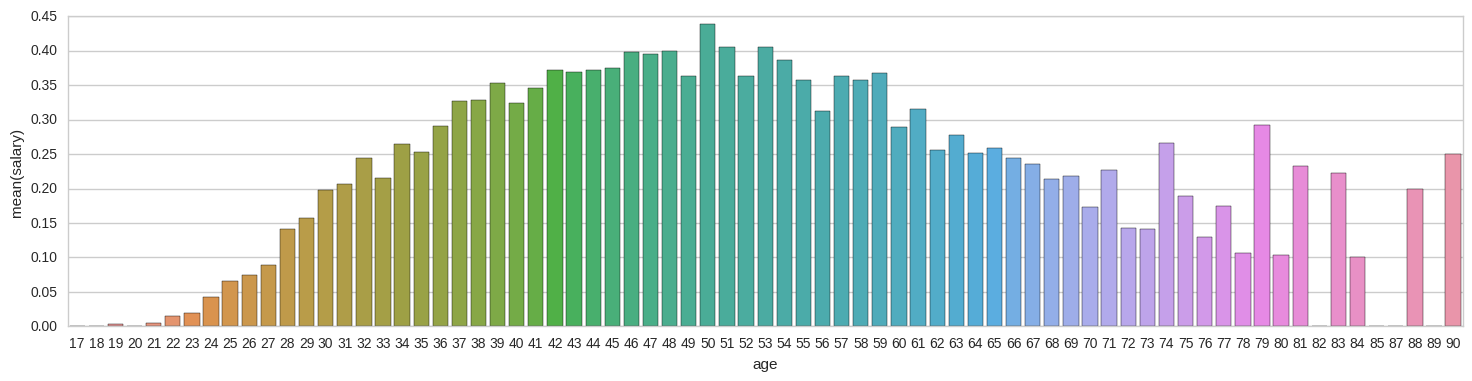

In [47]:
#plot Age column

# peaks for salary true or false  by their age
facet = sns.FacetGrid(train_df, hue="salary",aspect=4)
facet.map(sns.kdeplot,'age',shade= True)
facet.set(xlim=(0, train_df['age'].max()))
facet.add_legend()

# average salary passengers by age
fig, axis1 = plt.subplots(1,1,figsize=(18,4))
average_age = train_df[["age", "salary"]].groupby(['age'],as_index=False).mean()
sns.barplot(x='age', y='salary', data=average_age)

In [1]:

from sklearn.preprocessing import LabelEncoder

In [8]:
number =  LabelEncoder()
train_df['relationship']=number.fit_transform(train_df['relationship'].astype('str'))
train_df.head(15)

,id,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,3,Black,1,0,0,40,United-States,0
1,1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,0,White,1,0,0,50,United-States,0
2,2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,0,White,1,0,0,40,United-States,1
3,3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,0,Black,1,7688,0,40,United-States,1
4,5,34,Private,198693,10th,6,Never-married,Other-service,1,White,1,0,0,30,United-States,0
5,7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,0,White,1,3103,0,32,United-States,1
6,8,24,Private,369667,Some-college,10,Never-married,Other-service,4,White,0,0,0,40,United-States,0
7,9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,0,White,1,0,0,10,United-States,0
8,10,65,Private,184454,HS-grad,9,Married-civ-spouse,Machine-op-inspct,0,White,1,6418,0,40,United-States,1
9,12,26,Private,82091,HS-grad,9,Never-married,Adm-clerical,1,White,0,0,0,39,United-States,0
